In [53]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns
import csv
import functions as fn
import classes as cl

In [54]:
teamsN = {'Boston Bruins' : ['BOS','e','a'],'Buffalo Sabres ' : ['BUF','e','a'],'Detroit Red Wings' : ['DET','e','a'],'Florida Panthers' : ['FLA','e','a'],'Montreal Canadiens' : ['MON','e','a'],'Ottawa Senators' : ['OTT','e','a'],'Tampa Bay Lightning' :  ['TB','e','a'],'Toronto Maple Leafs' : ['TOR','e','a'],'Arizona Coyotes' : ['ARI','w','c'],'Chicago Blackhawks' : ['CHI','w','c'],'Colorado Avalanche' : ['COL','w','c'],'Dallas Stars' : ['DAL','w','c'],'Minnesota Wild' : ['MIN','w','c'],'Nashville Preditors' : ['NSH','w','c'],'St. Louis Blues' : ['STL','w','c'],'Winnipeg Jets' : ['WPG','w','c'],'Carolina Hurricanes' : ['CAR','e','m'],'Columbus Blue Jackets' : ['CLB','e','m'],'New York Islanders' : ['NYI','e','m'],'New York Rangers' : ['NYR','e','m'],'New Jersey Devils' :  ['NJ','e','m'],'Philadelphia Flyers' : ['PHI','e','m'],'Pittsburgh Penguins' : ['PIT','e','m'],'Washington Capitals' : ['WAS','e','m'],'Anaheim Ducks' : ['ANA','w','p'],'Calgary Flames' : ['CGY','w','p'],'Edmonton Oilers' : ['EDM','w','p'],'Los Angeles Kings' :  ['LA','w','p'],'San Jose Sharks' :  ['SJ','w','p'],'Seattle Kraken' : ['SEA','w','p'],'Vancouver Canucks' : ['VAN','w','p'],'Vegas Golden Knights' : ['LV','w','p']}

In [55]:
teamsDict = {}

for team in teamsN.items():
    name = team[0]
    id = team[1][0]
    devision = fn.devisionConvert(team[1][2]) 
    conference = fn.conferenceConvert(team[1][1])
    teamsDict[team[1][0]] = cl.Team(id,name,conference,devision)

In [56]:
playerDict = {}
with open('oldCSV/players.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
            if row[0] != 'playerID': 
                playerDict[row[0]] = cl.Player.from_list(row)


In [57]:
fileName = 'goals.csv'
goals_df = pd.read_sql_query('SELECT * FROM nhl.dbo.goals', fn.dbConnection())
goals_df.to_csv(fileName, index=False)
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        name = row[5]
        for player in playerDict:
            get_fullName = playerDict[player].get_fullName()
            if name == get_fullName: 
                playerDict[player].set_goal()

In [58]:
goalArray = []
for player in playerDict:
    if playerDict[player].get_goals() > 0:
        p = playerDict[player]
        goalArray.append((p.get_fullName(), p.get_goals(), p.get_team()))

In [59]:
df = pd.DataFrame(goalArray)
df = df.rename(columns={0:'name',1:'goals',2:'team'})
#df.loc[df['goals']==7]
goalCount = df['goals'].value_counts()

[]

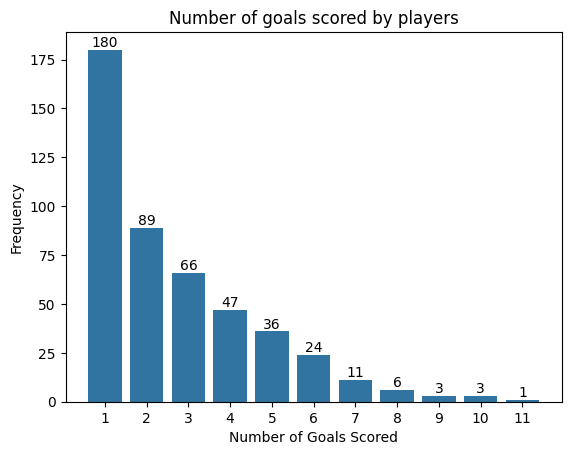

In [60]:
ax = sns.barplot(data=goalCount)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Number of Goals Scored', ylabel='Frequency', title='Number of goals scored by players')
ax.plot()

In [61]:
high = df.loc[df['goals']>=6]
high = high.sort_values(by='goals', ascending=False)
high = high.reset_index(drop=True)
high

,name,goals,team
0,Jack Hughes,11,NJ
1,Artemi Panarin,10,NYR
2,Dylan Larkin,10,DET
3,Quinn Hughes,10,VAN
4,Matthew Tkachuk,9,FLA
5,Mark Scheifele,9,WPG
6,Elias Pettersson,9,VAN
7,J.T. Compher,8,DET
8,Brandon Hagel,8,TB
9,Nikita Kucherov,8,TB


In [62]:
for goal in goalArray:
    teamsDict[goal[2]].set_goal(goal[1])

In [63]:
teamArray = []
for team in teamsDict:
    teamArray.append((teamsDict[team].ID,teamsDict[team].name,teamsDict[team].goals))
tdf = pd.DataFrame(teamArray)
tdf = tdf.rename(columns={0:'teamID',1:'team',2:'totalGoals'})
tdf = tdf.set_index('teamID')
tdf = tdf.sort_values('totalGoals', ascending=False)

In [64]:
gameArray = []
fileName = 'game.csv'
goals_df = pd.read_sql_query('SELECT * FROM nhl.dbo.game', fn.dbConnection())
goals_df.to_csv(fileName, index=False)

with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        home = row[2]
        visitor = row[1]
        winner = row[4]
        overtime = row[5]
        gameArray.append((home,visitor,winner,overtime))
    gameArray.pop(0)

In [65]:
gameArray

[('PIT', 'CHI', 'CHI', 'X'),
 ('TB', 'NSH', 'TB', 'X'),
 ('LV', 'SEA', 'LV', 'X'),
 ('BOS', 'CHI', 'BOS', 'X'),
 ('LA', 'COL', 'COL', 'X'),
 ('VAN', 'EDM', 'VAN', 'X'),
 ('TOR', 'MON', 'TOR', 'SO'),
 ('CAR', 'OTT', 'CAR', 'X'),
 ('CGY', 'WPG', 'CGY', 'X'),
 ('NJ', 'DET', 'NJ', 'X'),
 ('MIN', 'FLA', 'MIN', 'X'),
 ('SJ', 'LV', 'LV', 'X'),
 ('BUF', 'NYR', 'NYR', 'X'),
 ('CLB', 'PHI', 'PHI', 'X'),
 ('NSH', 'SEA', 'NSH', 'X'),
 ('DAL', 'STL', 'DAL', 'SO'),
 ('NJ', 'ARI', 'ARI', 'SO'),
 ('WAS', 'PIT', 'PIT', 'X'),
 ('LV', 'ANA', 'LV', 'X'),
 ('NYI', 'BUF', 'NYI', 'X'),
 ('LA', 'CAR', 'CAR', 'SO'),
 ('PIT', 'CGY', 'PIT', 'X'),
 ('MON', 'CHI', 'MON', 'X'),
 ('SJ', 'COL', 'COL', 'SO'),
 ('WPG', 'FLA', 'WPG', 'X'),
 ('TOR', 'MIN', 'TOR', 'X'),
 ('BOS', 'NSH', 'BOS', 'X'),
 ('CLB', 'NYR', 'CLB', 'X'),
 ('OTT', 'PHI', 'OTT', 'X'),
 ('STL', 'SEA', 'STL', 'SO'),
 ('DET', 'TB', 'DET', 'X'),
 ('EDM', 'VAN', 'VAN', 'X'),
 ('ANA', 'CAR', 'ANA', 'X'),
 ('OTT', 'TB', 'OTT', 'X'),
 ('NYR', 'ARI', 'NYR', 'X

In [66]:
gamedf = pd.DataFrame(gameArray)
gamedf = gamedf.rename(columns={0:'home', 1:'visitors', 2:'winner',3:'overtime'})
gamedf.sample(10)

,home,visitors,winner,overtime
206,ANA,PHI,PHI,X
144,NYR,CAR,NYR,X
38,NJ,FLA,FLA,X
94,FLA,SJ,FLA,X
224,ANA,SJ,ANA,X
98,NJ,WAS,WAS,X
60,FLA,TOR,FLA,X
210,MON,BOS,MON,OT
125,EDM,CGY,EDM,X
143,COL,STL,COL,X


In [67]:
for game in gameArray:
    home,away,winner,overtime = game
    '''
    winner send w to incrementScore('w')
    if ot not = 'x' incrementScore('otl)
    '''
    teamsDict[winner].set_Result('w')
    if overtime != 'X':
        if home == winner: teamsDict[away].set_Result('otl')
        else: teamsDict[home].set_Result('otl')
    else:
        if home == winner: teamsDict[away].set_Result('l')
        else: teamsDict[home].set_Result('l')
    

In [68]:
print(teamsDict['LV'])

Team Name : Vegas Golden Knights, Points : 25
Devision : Pacific, Confrence :Western 
Games Played 15, won 12, lossed 2, Overtime Losses 1 
Win percentage of 0.8


In [69]:
#con = 'Eastern'
con = 'Western'
print(f'Teams in the {con} confrence \n')
for team in teamsDict:
    if teamsDict[team].get_confrene() == con:
        print(teamsDict[team].name)

Teams in the Western confrence 

Arizona Coyotes
Chicago Blackhawks
Colorado Avalanche
Dallas Stars
Minnesota Wild
Nashville Preditors
St. Louis Blues
Winnipeg Jets
Anaheim Ducks
Calgary Flames
Edmonton Oilers
Los Angeles Kings
San Jose Sharks
Seattle Kraken
Vancouver Canucks
Vegas Golden Knights


In [70]:
#dev = 'Atlantic'
#dev = 'Metropolitan'
#dev = 'Central'
dev = 'Pacific'
devIDs = []

print(teamsDict['LV'])

print(f'Teams in the {dev} division \n')
for team in teamsDict:
    if teamsDict[team].get_devision() == dev:
       devIDs.append(teamsDict[team].get_id())

for team in devIDs:
    print(f'{teamsDict[team].name} {teamsDict[team].get_points()}')

Team Name : Vegas Golden Knights, Points : 25
Devision : Pacific, Confrence :Western 
Games Played 15, won 12, lossed 2, Overtime Losses 1 
Win percentage of 0.8
Teams in the Pacific division 

Anaheim Ducks 16
Calgary Flames 10
Edmonton Oilers 7
Los Angeles Kings 19
San Jose Sharks 5
Seattle Kraken 13
Vancouver Canucks 23
Vegas Golden Knights 25
